In [1]:
import pandas as pd
from datetime import datetime, timedelta
import requests
import json

C:\Users\alexa\AppData\Local\Temp\ipykernel_34104\3691816077.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [319]:
# By latitude and longitude
# API parameters

def make_key():
    return datetime.utcnow().strftime("%Y-%m-%dT%H-%M")
    
def get_recent_data():
    endtime = datetime.utcnow()
    starttime = endtime - timedelta(hours = 0.5)
    
    options = {}
    options["url"] = "https://airnowapi.org/aq/data/"
    options["parameters"] = "o3,pm25,pm10,co,no2,so2"
    options["bbox"] = "-180,-90, 180,90"
    options["data_type"] = "b"
    options["format"] = "application/json"
    options["ext"] = "json"
    options["api_key"] = "EB883725-96B2-407E-AAD0-7D4FFEF22290"
    options['includerawconcentrations'] = "1"
    options["start_date"] = starttime.strftime("%Y-%m-%dT%H:%M")
    options["end_date"] = endtime.strftime("%Y-%m-%dT%H:%M")
    
    # API request URL
    REQUEST_URL = options["url"] \
                  + "?startdate=" + options["start_date"] \
                  + "&enddate=" + options["end_date"] \
                  + "&parameters=" + options["parameters"] \
                  + "&bbox=" + options["bbox"] \
                  + "&datatype=" + options["data_type"] \
                  + "&format=" + options["format"] \
                  + "&api_key=" + options["api_key"] \
                  + "&includerawconcentrations" + options["includerawconcentrations"]
    
    r = requests.get(REQUEST_URL)
    data = json.loads(r.text)
    df = pd.DataFrame(data)
    return df

def parse_dataframe(df):
    df_parse = pd.DataFrame()
    for parameter in df['Parameter'].unique():
        df_param = df.loc[df['Parameter'] == parameter]
        df_param = df_param.rename({'Unit':f'Unit_{parameter}','Value':f'Value_{parameter}','AQI':f'AQI_{parameter}','Category':f'Category_{parameter}'},axis=1)
        df_param = df_param.drop(labels = 'Parameter',axis=1)
        if len(df_parse) > 0:
            df_parse = df_param.merge(df_parse, on=['Latitude','Longitude','UTC'],how='outer')
        else:
            df_parse = df_param
    return df_parse

def write_to_local(df, key):
    filename = './tmp' + "/" + key
    df.to_json(filename)
    return filename

In [322]:
fn = write_to_local(parse_dataframe(get_recent_data()), make_key())
print(fn)

./tmp/2024-02-24T04-02


In [323]:
pd.read_json(fn)

,Latitude,Longitude,UTC,Unit_PM2.5,Value_PM2.5,AQI_PM2.5,Category_PM2.5
0,43.381943,-124.263885,2024-02-24T04:00,UG/M3,7.7,32,1
1,41.875556,-103.658056,2024-02-24T04:00,UG/M3,1.4,6,1
2,40.918333,-98.378889,2024-02-24T04:00,UG/M3,2.3,10,1
3,40.285060,-96.824310,2024-02-24T04:00,UG/M3,0.6,3,1
4,-25.293536,-57.603950,2024-02-24T04:00,UG/M3,15.1,57,2
5,14.744791,-17.526484,2024-02-24T04:00,UG/M3,80.2,164,4
6,43.856665,18.398205,2024-02-24T04:00,UG/M3,16.2,60,2
7,30.041470,31.232890,2024-02-24T04:00,UG/M3,31.8,92,2
8,40.386992,49.842946,2024-02-24T04:00,UG/M3,8.9,37,1
9,1.357350,103.699997,2024-02-24T04:00,UG/M3,8.1,34,1


In [282]:
endtime = datetime.utcnow()
starttime = endtime - timedelta(hours = 2)

options = {}
options["url"] = "https://airnowapi.org/aq/data/"
options["parameters"] = "o3,pm25,pm10,co,no2,so2"
options["bbox"] = "-180,-90, 180,90"
options["data_type"] = "b"
options["format"] = "application/json"
options["ext"] = "json"
options["api_key"] = "EB883725-96B2-407E-AAD0-7D4FFEF22290"
options['includerawconcentrations'] = "1"
options["start_date"] = starttime.strftime("%Y-%m-%dT%H:%M")
options["end_date"] = endtime.strftime("%Y-%m-%dT%H:%M")

# API request URL
REQUEST_URL = options["url"] \
              + "?startdate=" + options["start_date"] \
              + "&enddate=" + options["end_date"] \
              + "&parameters=" + options["parameters"] \
              + "&bbox=" + options["bbox"] \
              + "&datatype=" + options["data_type"] \
              + "&format=" + options["format"] \
              + "&api_key=" + options["api_key"] \
              + "&includerawconcentrations" + options["includerawconcentrations"]

r = requests.get(REQUEST_URL)
data = json.loads(r.text)
df = pd.DataFrame(data)

df_parse = pd.DataFrame()
for parameter in df['Parameter'].unique():
    df_param = df.loc[df['Parameter'] == parameter]
    df_param = df_param.rename({'Unit':f'Unit_{parameter}','Value':f'Value_{parameter}','AQI':f'AQI_{parameter}','Category':f'Category_{parameter}'},axis=1)
    df_param = df_param.drop(labels = 'Parameter',axis=1)
    if len(df_parse) > 0:
        df_parse = df_param.merge(df_parse, on=['Latitude','Longitude','UTC'],how='outer')
    else:
        df_parse = df_param

df = df_parse
len(df)

3322

In [286]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import seaborn as sns

In [247]:
#na_map = gpd.read_file('./Map data/North America/North_America.shp')
us_map = gpd.read_file('./Map data/cb_2018_us_state_500k.shp')
ca_map = gpd.read_file('./Map data/North America/gpr_000b11a_e.shp')
me_map = gpd.read_file('./Map data/North America/mexican-states/mexican-states.shp')

In [242]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

In [243]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

C:\Users\alexa\anaconda3\envs\YOLO\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Latitude,Longitude,UTC,Unit_CO,Value_CO,AQI_CO,Category_CO,Unit_SO2,Value_SO2,AQI_SO2,...,Category_OZONE,Unit_PM10,Value_PM10,AQI_PM10,Category_PM10,Unit_PM2.5,Value_PM2.5,AQI_PM2.5,Category_PM2.5,geometry
0,-25.903820,32.62835,2024-02-24T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,UG/M3,6.2,26.0,1.0,POINT (32.62835 -25.90382)
1,-25.903820,32.62835,2024-02-24T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,UG/M3,6.2,26.0,1.0,POINT (32.62835 -25.90382)
2,-25.293536,-57.60395,2024-02-24T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,UG/M3,16.4,60.0,2.0,POINT (-57.60395 -25.29354)
3,-25.293536,-57.60395,2024-02-24T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,UG/M3,15.1,57.0,2.0,POINT (-57.60395 -25.29354)
4,-18.908480,47.53751,2024-02-24T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,UG/M3,17.9,63.0,2.0,POINT (47.53751 -18.90848)


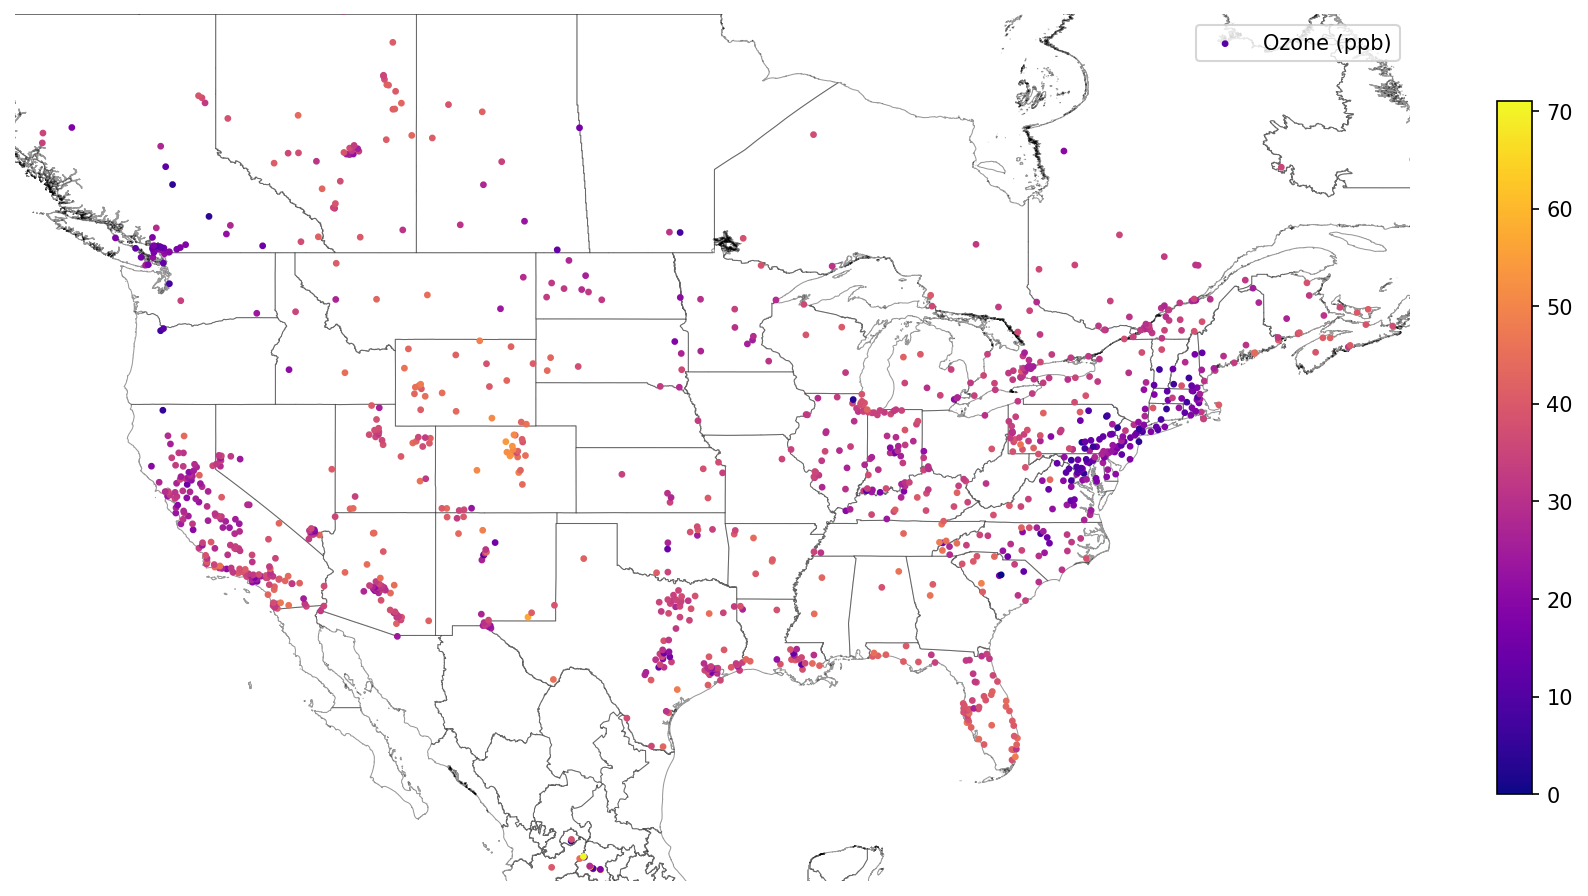

In [248]:
fig, ax = plt.subplots(figsize=(15,15),dpi=150)
me_map.plot(ax=ax, alpha=0.4, color="white",edgecolor='black',linewidth = 0.5)
us_map.plot(ax=ax, alpha=0.4, color="white",edgecolor='black',linewidth = 0.5)
ca_map.plot(ax=ax, alpha=0.4, color="white",edgecolor='black',linewidth = 0.5)
geo_df.plot(ax=ax,column = 'Value_OZONE',cmap = 'plasma', s=5,legend=True,legend_kwds={"shrink":.4},label = 'Ozone (ppb)')
plt.xlim([-130,-60.5])
plt.ylim([20, 60])
plt.legend()
ax.axis("off")
plt.legend()

In [283]:
def get_location_info(row):
    p1 = Point(map(float, (row['Longitude'],row['Latitude'])))
    names = us_map.loc[us_map['geometry'].contains(p1)]['NAME']
    if len(names.unique()) > 1:
        print('Error: Multiple names')
        return None
    elif len(names) < 1:
        return None
    else:
        return names.mode()[0]

In [284]:
df['State'] = df.apply(lambda x: get_location_info(x),axis=1)

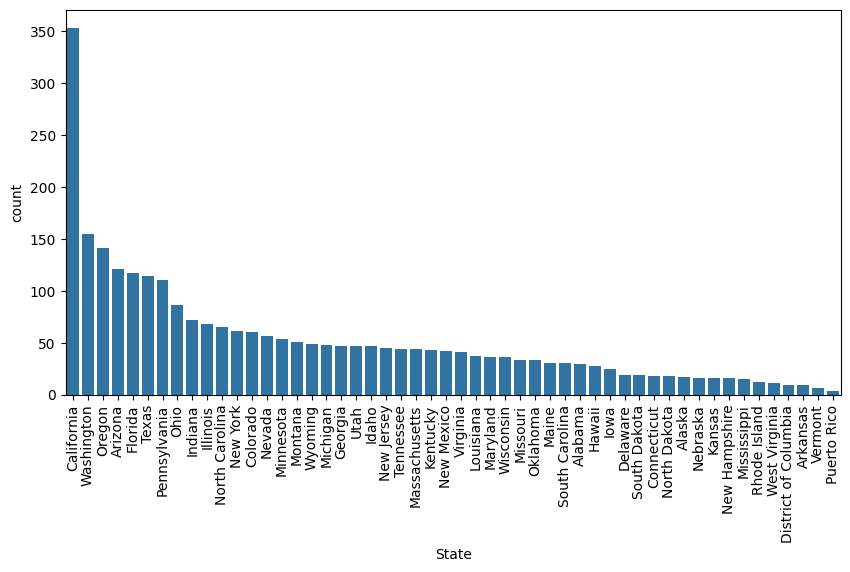

In [285]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data=df, x='State',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()